<a href="https://colab.research.google.com/github/modraqueeb/IndusVision/blob/main/Task10_MLintern.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Mar 19 05:07:24 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   60C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


f
i
n
a
l


diameter of circle 172


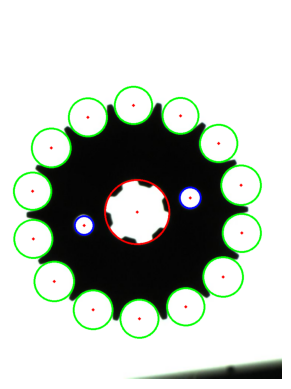

14
[[340 544  86]
 [620 600  51]
 [558 360  50]
 [618 472  53]
 [110 372  52]
 [330 258  50]
 [482 506  28]
 [118 730  53]
 [222 806  52]
 [208 290  51]
 [346 830  51]
 [ 62 616  51]
 [198 580  25]
 [570 718  53]
 [470 798  50]
 [456 286  48]
 [ 60 488  50]]


NameError: name 'dia' is not defined

In [71]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files


image = cv2.imread('/content/1000144007.jpg')

gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

blurred_image = cv2.GaussianBlur(gray_image, (15, 15), 0)


circles = cv2.HoughCircles(
    blurred_image,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=20,
    param1=50,
    param2=35,
    minRadius=10,
    maxRadius=100
)
count=0
scircle=[]
mcircle=[]
lcircle=[]
outcentre1=[]
outcentre2=[]
incenter=[]

if circles is not None:

    circles = np.round(circles[0, :]).astype("int")


    for (x, y, r) in circles:
        if (r<30):

          scircle.append(r)
          cv2.circle(image, (x, y), r, (255, 0, 0), 4)
          cv2.circle(image, (x, y), 2, (0, 0, 255), 3)

        elif (r>25)&(r<80):
          count+=1
          outcentre1.append(x)
          outcentre2.append(y)
          mcircle.append(r)
          cv2.circle(image, (x, y), r, (0, 255, 0), 4)
          cv2.circle(image, (x, y), 2, (0, 0, 255), 3)


        else:
         lcircle.append(r)
         incenter.append([x,y])
         cv2.circle(image, (x, y), r, (0, 0, 255), 4)
         cv2.circle(image, (x, y), 2, (0, 0, 255), 3)
         print("diameter of circle",r*2)


mmean=np.mean(mcircle)








image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)




plt.imshow(image_rgb)
plt.axis('off')
plt.show()
print(count)
print(circles)




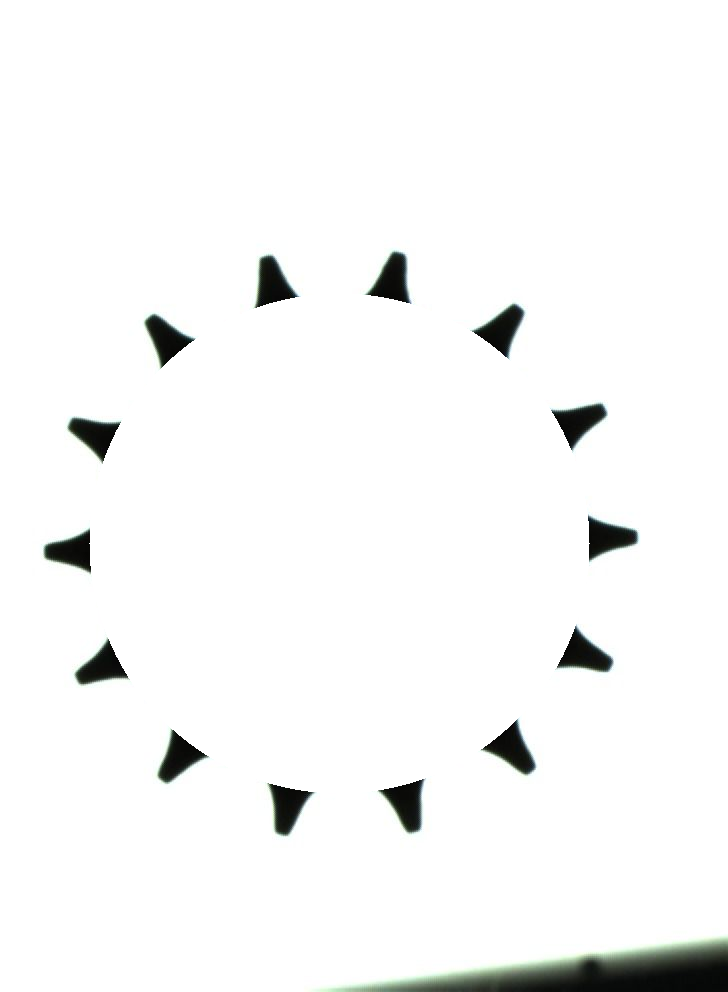

In [104]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


image = cv2.imread('/content/1000144007.jpg')


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)


_, threshold_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)


contours, hierarchy = cv2.findContours(threshold_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


filtered_contours = []
for contour in contours:
    if cv2.contourArea(contour) > 100:
        # Check if the contour is inside the image (avoid contours at the boundary)
        if cv2.pointPolygonTest(contour, (0, 0), False) < 0 and \
           cv2.pointPolygonTest(contour, (image.shape[1]-1, 0), False) < 0 and \
           cv2.pointPolygonTest(contour, (0, image.shape[0]-1), False) < 0 and \
           cv2.pointPolygonTest(contour, (image.shape[1]-1, image.shape[0]-1), False) < 0:
            filtered_contours.append(contour)


if filtered_contours:
    largest_contour = max(filtered_contours, key=cv2.contourArea)


    M = cv2.moments(largest_contour)


    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])


        cv2.circle(image, (cx, cy), 250, (255, 255, 255), -1)



    cv2_imshow(image)


    cv2.imwrite('output_with_largest_centroid.jpg', image)


else:
    print("No valid contours found.")


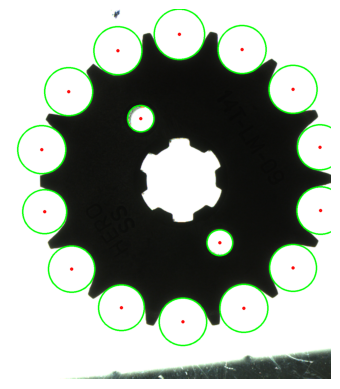

[[ 446  374   45]
 [ 200  282   82]
 [ 716  798   44]
 [ 798 1022   82]
 [ 210  888   79]
 [ 966  884   80]
 [ 380 1020   78]
 [1060  688   81]
 [ 792  138   82]
 [ 966  274   82]
 [ 590 1068   81]
 [ 108  480   82]
 [ 578   86   86]
 [1058  472   77]
 [ 118  692   75]
 [ 368  142   82]]


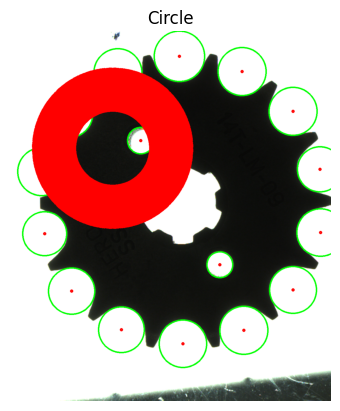

In [78]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('/content/HT-GEF890GC-T1-C-Snapshot-20250321-115418-771-14366948446412.BMP')


gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


gray_blurred = cv2.GaussianBlur(gray, (15, 15), 0)


circles = cv2.HoughCircles(
    gray_blurred,
    cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=50,
    param1=50,
    param2=30,
    minRadius=10,
    maxRadius=100
)


if circles is not None:

    circles = np.round(circles[0, :]).astype("int")


    for (x, y, r) in circles:

        cv2.circle(image, (x, y), r, (0, 255, 0), 4)

        cv2.circle(image, (x, y), 3, (0, 0, 255), 3)


image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image_rgb)
plt.axis('off')
plt.show()
print(circles)



ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

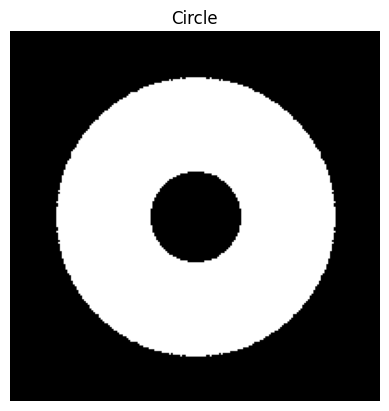

In [39]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def createImage(height, width):
    image = np.zeros((height, width), dtype=np.uint8)
    return image

def showImage(image, title="Image"):
    plt.imshow(image, cmap= "gray")
    plt.title(title)
    plt.axis("Off")
    plt.imsave(title+".png",image, cmap="gray")

image = createImage(200, 200)
circleImage = cv2.circle(image, (100, 100), 50, 255, 50)
showImage(circleImage, title="Circle")


imageact = cv2.imread('/content/g4.BMP')


imagefinal=createImage(200,200)


for i in range(200):
  for j in range(200):

    if circleImage[i][j]==(0,0,0):
      imagefinal[i][j]=imageact[i,j]

    else :
      imagefinal[i][j]=circleImage[i][j]

showImage(imagefinal)





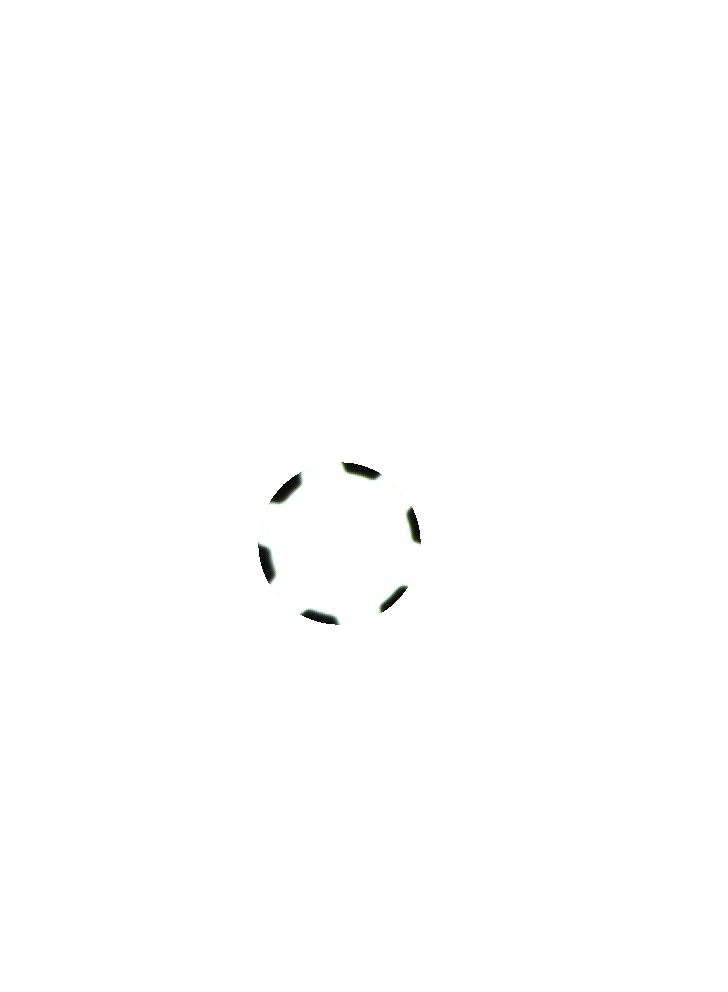

Length (perimeter) of contour: 91.01219272613525
Length (perimeter) of contour: 86.81118273735046
Length (perimeter) of contour: 100.08326029777527
Length (perimeter) of contour: 89.35533833503723
Length (perimeter) of contour: 101.88224947452545
Length (perimeter) of contour: 96.42640602588654


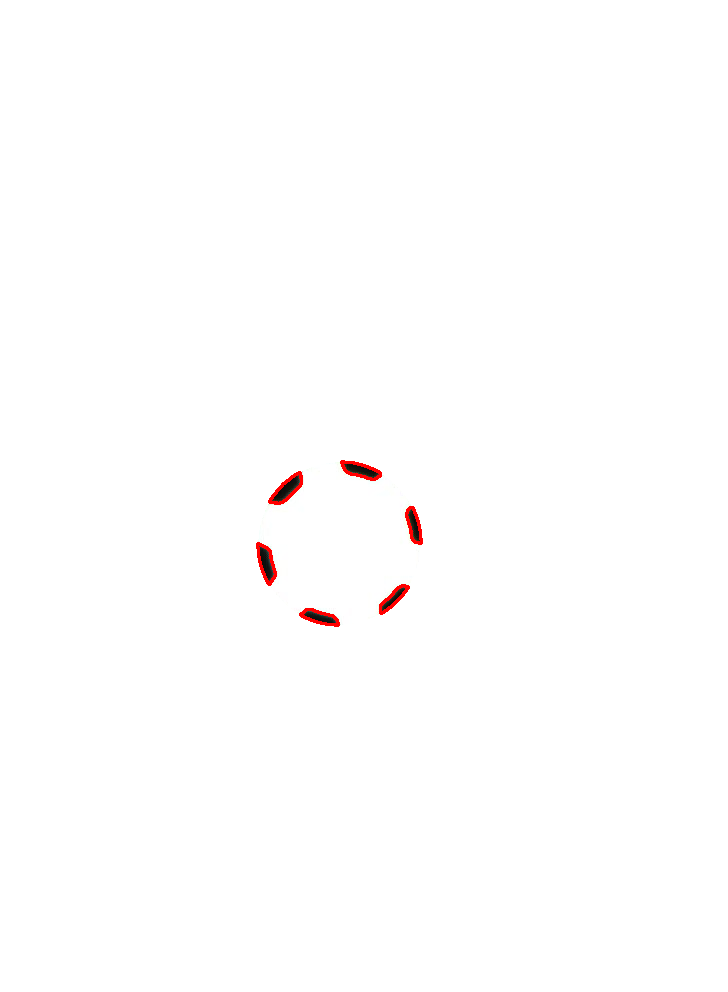

In [120]:


import cv2
import numpy as np
from google.colab.patches import cv2_imshow


image = cv2.imread('/content/1000144007.jpg')


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)


_, threshold_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)


contours, hierarchy = cv2.findContours(threshold_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


filtered_contours = []
for contour in contours:
    if cv2.contourArea(contour) > 100:
        # Check if the contour is inside the image (avoid contours at the boundary)
        if cv2.pointPolygonTest(contour, (0, 0), False) < 0 and \
           cv2.pointPolygonTest(contour, (image.shape[1]-1, 0), False) < 0 and \
           cv2.pointPolygonTest(contour, (0, image.shape[0]-1), False) < 0 and \
           cv2.pointPolygonTest(contour, (image.shape[1]-1, image.shape[0]-1), False) < 0:
            filtered_contours.append(contour)


if filtered_contours:
    largest_contour = max(filtered_contours, key=cv2.contourArea)


    M = cv2.moments(largest_contour)


    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])


        cv2.circle(image, (cx, cy), 395, (255, 255, 255), 625)



    cv2_imshow(image)


    gray_image_with_circle = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    _, threshold_image_with_circle = cv2.threshold(gray_image_with_circle, 127, 255, cv2.THRESH_BINARY)


    contours_with_circle, _ = cv2.findContours(threshold_image_with_circle, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


    filtered_contours_with_circle = []
    for contour in contours_with_circle:
        if cv2.contourArea(contour) > 100:
            x, y, w, h = cv2.boundingRect(contour)
            if x > boundary_margin and y > boundary_margin and \
               x + w < width - boundary_margin and y + h < height - boundary_margin:
                filtered_contours_with_circle.append(contour)


    # Draw the filtered contours after circle
    cv2.drawContours(image, filtered_contours_with_circle, -1, (0, 0, 255), 2)  # Draw contours in red

    # Calculate the length (perimeter) of each contour after the circle
    for contour in filtered_contours_with_circle:
        contour_length = cv2.arcLength(contour, True)
        print(f"Length (perimeter) of contour: {contour_length}")

    # Display the image with contours and the centroid circle
    cv2_imshow(image)

    # Save the output image with contours and the circle
    cv2.imwrite('output_with_contours_after_circle.jpg', image)
else:
    print("No valid contours found.")


Length (perimeter) of contour: 221.82337474822998
Length (perimeter) of contour: 230.40916085243225
Length (perimeter) of contour: 215.66399371623993
Length (perimeter) of contour: 234.49242162704468
Length (perimeter) of contour: 217.7645001411438
Length (perimeter) of contour: 247.32084953784943
Length (perimeter) of contour: 174.32590079307556
Length (perimeter) of contour: 225.9655100107193
Length (perimeter) of contour: 260.87719762325287
Length (perimeter) of contour: 206.4924224615097
Length (perimeter) of contour: 262.29140985012054
Length (perimeter) of contour: 244.65180146694183
Length (perimeter) of contour: 261.2792180776596
13
[174.32590079307556, 206.4924224615097, 215.66399371623993, 217.7645001411438, 221.82337474822998, 225.9655100107193, 230.40916085243225, 234.49242162704468, 244.65180146694183, 247.32084953784943, 260.87719762325287, 261.2792180776596, 262.29140985012054]


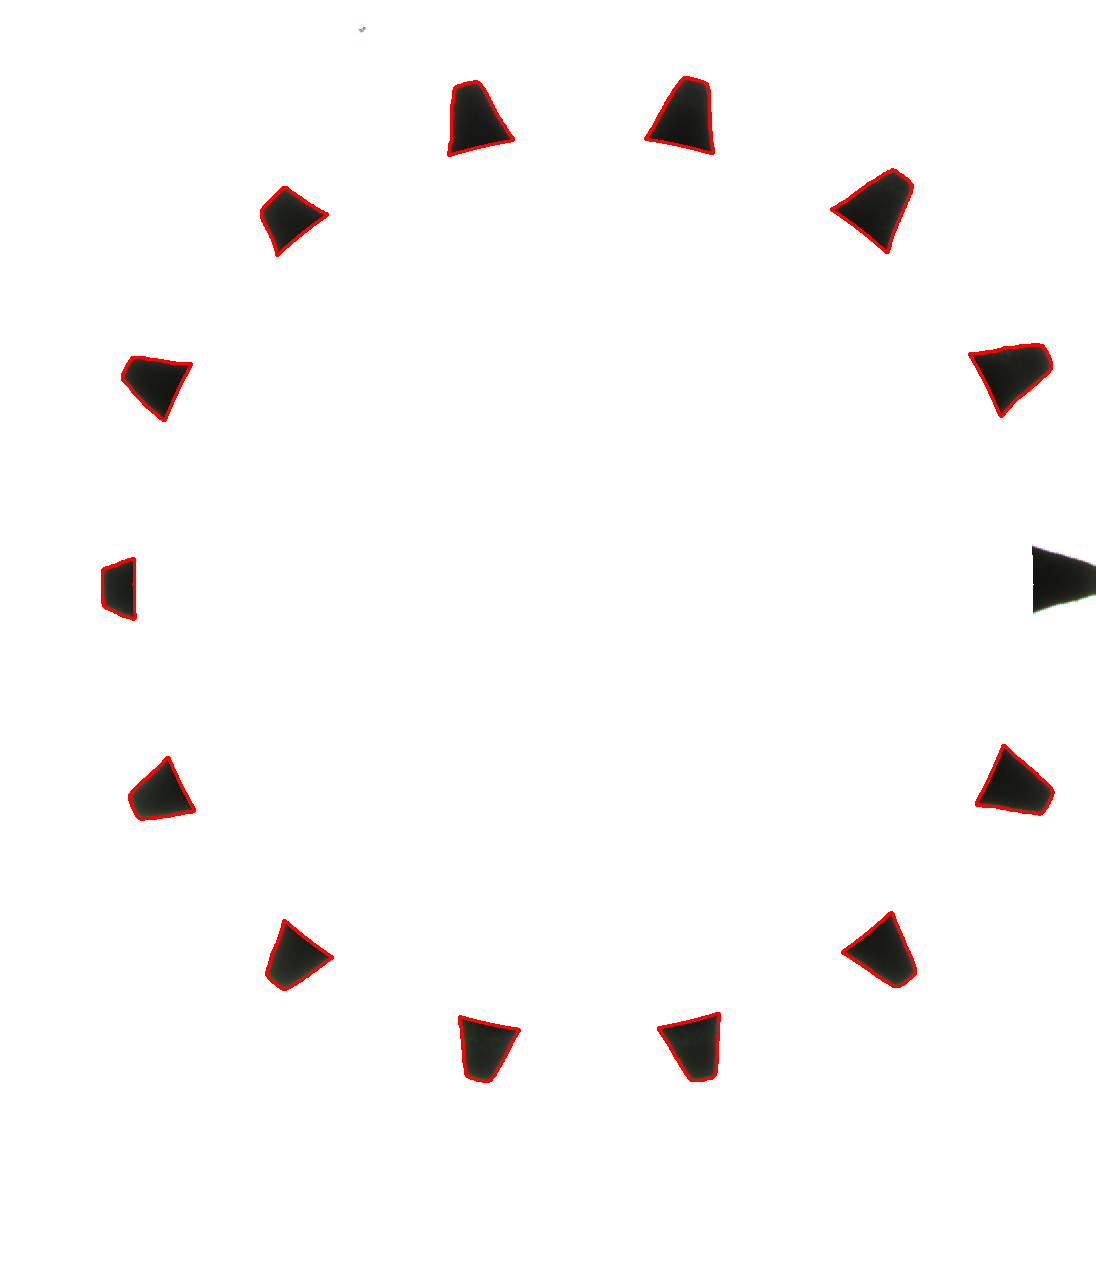

In [126]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


image = cv2.imread('/content/HT-GEF890GC-T1-C-Snapshot-20250321-115418-771-14366948446412 (1).BMP')


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)


_, threshold_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)


contours, hierarchy = cv2.findContours(threshold_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

# Filter contours based on area and exclude contours at the boundary
filtered_contours = []
height, width = image.shape[:2]
boundary_margin = 10  # Set a margin to avoid contours near the boundary

for contour in contours:
    if cv2.contourArea(contour) > 100:  # Filter small contours
        # Get the bounding rectangle for each contour
        x, y, w, h = cv2.boundingRect(contour)

        # Check if the bounding box is far from the boundary of the image
        if x > boundary_margin and y > boundary_margin and \
           x + w < width - boundary_margin and y + h < height - boundary_margin:
            filtered_contours.append(contour)
emp=[]
# If valid contours are found
if filtered_contours:
    # Find the largest contour
    largest_contour = max(filtered_contours, key=cv2.contourArea)

    # Calculate the centroid of the largest contour
    M = cv2.moments(largest_contour)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])


        cv2.circle(image, (cx, cy), 450, (255, 255, 255), -1)
        cv2.circle(image, (cx, cy), 750, (255, 255, 255), 300)


    gray_image_with_circle = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    _, threshold_image_with_circle = cv2.threshold(gray_image_with_circle, 127, 255, cv2.THRESH_BINARY)


    contours_with_circle, _ = cv2.findContours(threshold_image_with_circle, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


    filtered_contours_with_circle = []
    for contour in contours_with_circle:
        if cv2.contourArea(contour) > 100:
            x, y, w, h = cv2.boundingRect(contour)
            if x > boundary_margin and y > boundary_margin and \
               x + w < width - boundary_margin and y + h < height - boundary_margin:
                filtered_contours_with_circle.append(contour)



    cv2.drawContours(image, filtered_contours_with_circle, -1, (0, 0, 255), 2)


    for contour in filtered_contours_with_circle:
        contour_length = cv2.arcLength(contour, True)
        emp.append(contour_length)
        emp.sort()
        print(f"Length (perimeter) of contour: {contour_length}")

    print(len(emp))
    print(emp)
    # Display the image with contours and the centroid circle
    cv2_imshow(image)

    # Save the output image with contours and the circle
    cv2.imwrite('output_with_contours_after_circle.jpg', image)
else:
    print("No valid contours found.")


Length (perimeter) of contour: 91.01219272613525
Length (perimeter) of contour: 86.81118273735046
Length (perimeter) of contour: 100.08326029777527
Length (perimeter) of contour: 89.35533833503723
Length (perimeter) of contour: 101.88224947452545
Length (perimeter) of contour: 96.42640602588654


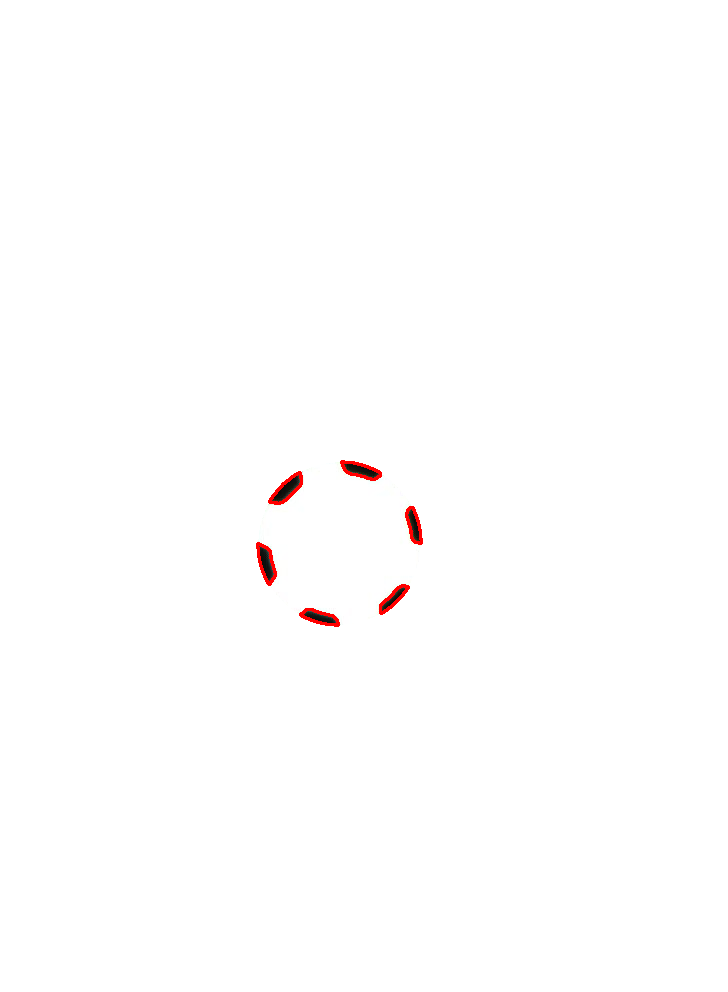

In [136]:


import cv2
import numpy as np
from google.colab.patches import cv2_imshow


image = cv2.imread('/content/1000144007.jpg')


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)


_, threshold_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)


contours, hierarchy = cv2.findContours(threshold_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


filtered_contours = []
for contour in contours:
    if cv2.contourArea(contour) > 100:
        # Check if the contour is inside the image (avoid contours at the boundary)
        if cv2.pointPolygonTest(contour, (0, 0), False) < 0 and \
           cv2.pointPolygonTest(contour, (image.shape[1]-1, 0), False) < 0 and \
           cv2.pointPolygonTest(contour, (0, image.shape[0]-1), False) < 0 and \
           cv2.pointPolygonTest(contour, (image.shape[1]-1, image.shape[0]-1), False) < 0:
            filtered_contours.append(contour)


if filtered_contours:
    largest_contour = max(filtered_contours, key=cv2.contourArea)


    M = cv2.moments(largest_contour)


    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])


        cv2.circle(image, (cx, cy), 395, (255, 255, 255), 625)






    gray_image_with_circle = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    _, threshold_image_with_circle = cv2.threshold(gray_image_with_circle, 127, 255, cv2.THRESH_BINARY)


    contours_with_circle, _ = cv2.findContours(threshold_image_with_circle, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


    filtered_contours_with_circle = []
    for contour in contours_with_circle:
        if cv2.contourArea(contour) > 100:
            x, y, w, h = cv2.boundingRect(contour)
            if x > boundary_margin and y > boundary_margin and \
               x + w < width - boundary_margin and y + h < height - boundary_margin:
                filtered_contours_with_circle.append(contour)



    cv2.drawContours(image, filtered_contours_with_circle, -1, (0, 0, 255), 2)


    for contour in filtered_contours_with_circle:
        contour_length = cv2.arcLength(contour, True)
        print(f"Length (perimeter) of contour: {contour_length}")


    cv2_imshow(image)


    cv2.imwrite('output_with_contours_after_circle.jpg', image)
else:
    print("No valid contours found.")


61 66
62 68
67 70
74 75
66 63
75 69
34 62
63 69
70 64
79 73
67 69
80 80
66 71
69 70
1096 1264
Length (perimeter) of contour: 221.82337474822998
Length (perimeter) of contour: 228.75230658054352
Length (perimeter) of contour: 215.66399371623993
Length (perimeter) of contour: 232.14927542209625
Length (perimeter) of contour: 217.7645001411438
Length (perimeter) of contour: 241.07820904254913
Length (perimeter) of contour: 174.32590079307556
Length (perimeter) of contour: 242.2670258283615
Length (perimeter) of contour: 225.9655100107193
Length (perimeter) of contour: 249.80612969398499
Length (perimeter) of contour: 206.4924224615097
Length (perimeter) of contour: 248.2914093732834
Length (perimeter) of contour: 237.33809340000153
Length (perimeter) of contour: 248.30865573883057
[-53.53315685 -21.36663518 -12.19506392 -10.0945575   -6.03568289
  -1.89354763   0.89324894   4.29021778   9.47903576  13.2191514
  14.40796819  20.43235173  20.4495981   21.94707205]
227.85905763932638
[-2.720

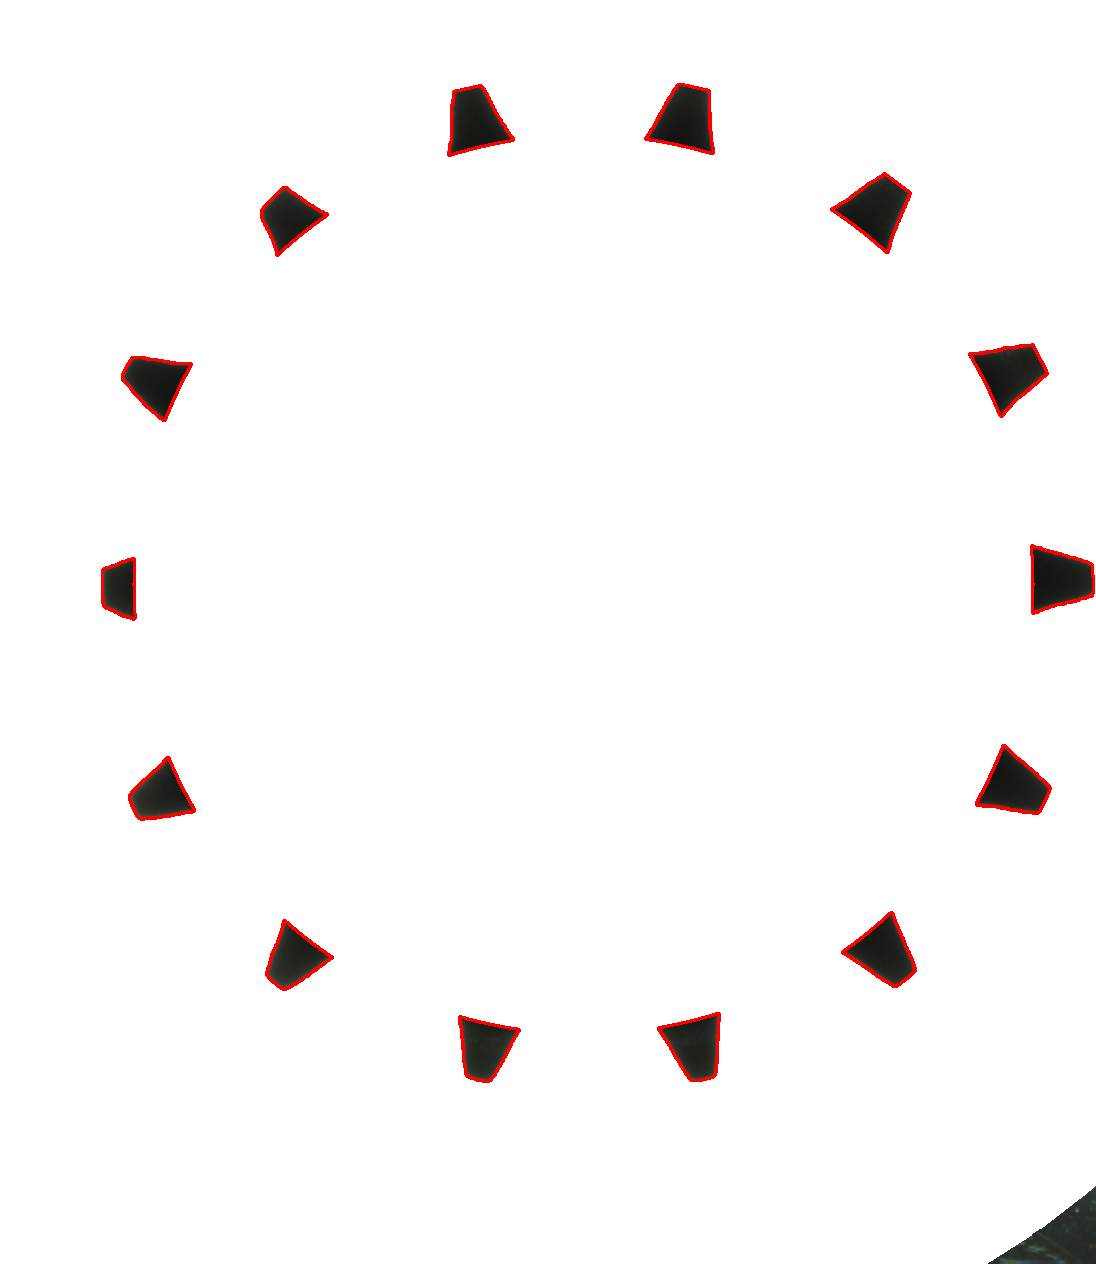

In [5]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


image = cv2.imread('/content/HT-GEF890GC-T1-C-Snapshot-20250321-115418-771-14366948446412 (1).BMP')


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)


_, threshold_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)


contours, hierarchy = cv2.findContours(threshold_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


filtered_contours = []
height, width = image.shape[:2]
boundary_margin = 0

for contour in contours:
    if cv2.contourArea(contour) > 100:

        x, y, w, h = cv2.boundingRect(contour)


        if x > boundary_margin and y > boundary_margin and \
           x + w < width - boundary_margin and y + h < height - boundary_margin:
            filtered_contours.append(contour)

emp = []

if filtered_contours:

    largest_contour = max(filtered_contours, key=cv2.contourArea)


    M = cv2.moments(largest_contour)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])


        cv2.circle(image, (cx, cy), 450, (255, 255, 255), -1)
        cv2.circle(image, (cx, cy), 650, (255,255, 255), 280)


    gray_image_with_circle = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    _, threshold_image_with_circle = cv2.threshold(gray_image_with_circle, 127, 255, cv2.THRESH_BINARY)


    contours_with_circle, _ = cv2.findContours(threshold_image_with_circle, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


    filtered_contours_with_circle = []
    for contour in contours_with_circle:
        if cv2.contourArea(contour) > 100:
            x, y, w, h = cv2.boundingRect(contour)
            print(w,h)

            if x > boundary_margin and y > boundary_margin and \
               x + w < width - boundary_margin and y + h < height - boundary_margin:
                filtered_contours_with_circle.append(contour)


    cv2.drawContours(image, filtered_contours_with_circle, -1, (0, 0, 255), 2)


    for contour in filtered_contours_with_circle:
        contour_length = cv2.arcLength(contour, True)
        emp.append(contour_length)
        emp.sort()


        print(f"Length (perimeter) of contour: {contour_length}")
    mean=np.mean(emp)
    print(np.array(emp)-mean)
    print(mean)
    std= np.std(emp)
    print((np.array(emp)-mean)/std)

    norm=(np.array(emp)-mean)/std
    median = np.mean([norm[len(norm)//2], norm[len(norm)//2+1]])
    print("median ", median)
    min_val = abs(min(norm)-median)
    max_val = abs(max(norm)-median)
    print("min: ", min_val, "max: ", max_val, "diff: ", abs(max_val-min_val))

    print(f"Number of contours: {len(emp)}")
    print(f"Contour lengths: {emp}")


    cv2_imshow(image)


    cv2.imwrite('output_with_contours_after_circle.jpg', image)
else:
    print("No valid contours found.")


52 54
52 61
54 61
61 60
61 56
59 50
56 51
57 52
59 50
63 57
60 61
57 61
49 61
53 54
728 847
Length (perimeter) of contour: 187.53910386562347
Length (perimeter) of contour: 186.40916180610657
Length (perimeter) of contour: 189.96550977230072
Length (perimeter) of contour: 184.69343268871307
Length (perimeter) of contour: 183.72286915779114
Length (perimeter) of contour: 187.19595789909363
Length (perimeter) of contour: 184.95331740379333
Length (perimeter) of contour: 190.85281205177307
Length (perimeter) of contour: 192.16652023792267
Length (perimeter) of contour: 189.5218586921692
Length (perimeter) of contour: 186.6934312582016
Length (perimeter) of contour: 190.7939372062683
Length (perimeter) of contour: 191.13708305358887
Length (perimeter) of contour: 187.88224971294403
[-4.38621976 -3.41565623 -3.15577151 -1.69992711 -1.41565766 -0.91313102
 -0.56998505 -0.2268392   1.41276978  1.85642086  2.68484829  2.74372314
  3.02799414  4.05743132]
188.10908891473497
[-1.70384614 -1.3268

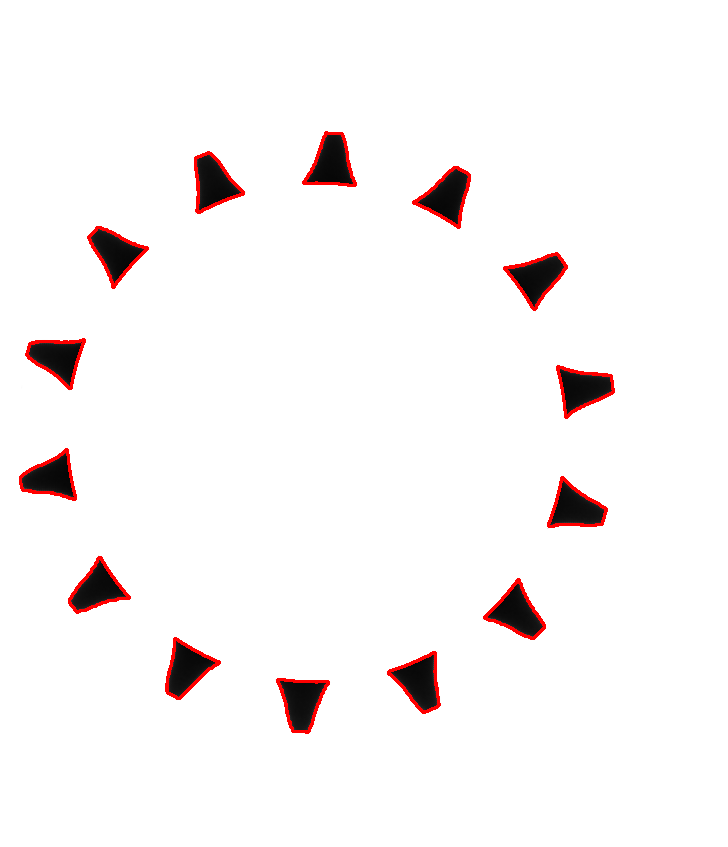

In [12]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow


image = cv2.imread('/content/g4.BMP')


gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)


_, threshold_image = cv2.threshold(blurred_image, 127, 255, cv2.THRESH_BINARY)


contours, hierarchy = cv2.findContours(threshold_image, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


filtered_contours = []
height, width = image.shape[:2]
boundary_margin = 0

for contour in contours:
    if cv2.contourArea(contour) > 100:

        x, y, w, h = cv2.boundingRect(contour)


        if x > boundary_margin and y > boundary_margin and \
           x + w < width - boundary_margin and y + h < height - boundary_margin:
            filtered_contours.append(contour)

emp = []

if filtered_contours:
    largest_contour = max(filtered_contours, key=cv2.contourArea)


    M = cv2.moments(largest_contour)
    if M['m00'] != 0:
        cx = int(M['m10'] / M['m00'])
        cy = int(M['m01'] / M['m00'])


        cv2.circle(image, (cx, cy), 250, (255, 255, 255), -1)
        cv2.circle(image, (cx, cy), 350, (255,255, 255), 100)


    gray_image_with_circle = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


    _, threshold_image_with_circle = cv2.threshold(gray_image_with_circle, 127, 255, cv2.THRESH_BINARY)


    contours_with_circle, _ = cv2.findContours(threshold_image_with_circle, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)


    filtered_contours_with_circle = []
    for contour in contours_with_circle:
        if cv2.contourArea(contour) > 100:
            x, y, w, h = cv2.boundingRect(contour)
            print(w,h)

            if x > boundary_margin and y > boundary_margin and \
               x + w < width - boundary_margin and y + h < height - boundary_margin:
                filtered_contours_with_circle.append(contour)


    cv2.drawContours(image, filtered_contours_with_circle, -1, (0, 0, 255), 2)


    for contour in filtered_contours_with_circle:
        contour_length = cv2.arcLength(contour, True)
        emp.append(contour_length)
        emp.sort()


        print(f"Length (perimeter) of contour: {contour_length}")
    mean=np.mean(emp)
    print(np.array(emp)-mean)
    print(mean)
    std= np.std(emp)
    print((np.array(emp)-mean)/std)

    norm=(np.array(emp)-mean)/std
    median = np.mean([norm[len(norm)//2], norm[len(norm)//2+1]])
    print("median ", median)
    min_val = abs(min(norm)-median)
    max_val = abs(max(norm)-median)
    print("min: ", min_val, "max: ", max_val, "diff: ", abs(max_val-min_val))

    print(f"Number of contours: {len(emp)}")
    print(f"Contour lengths: {emp}")


    cv2_imshow(image)


    cv2.imwrite('output_with_contours_after_circle.jpg', image)
else:
    print("No valid contours found.")
